In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [ ]:
import pandas as pd
df = pd.read_csv("philadelphia_top_5_Zahav.csv")
df.head()

,business_id,categories,state,address,city,name,user_id,review_id,text,date,stars
0,ctHjyadbDQAtUFfkcAFEHw,"Nightlife, Bars, Food, Ethnic Food, Middle Eas...",PA,237 St James Pl,Philadelphia,Zahav,XZxMgbZiaXuCTb0l--RoUg,aU8tQnFO-Wdbo325Ax7f1A,date night with girlfriend here was perfect. i...,2014-04-19 12:20:39,5.0
1,ctHjyadbDQAtUFfkcAFEHw,"Nightlife, Bars, Food, Ethnic Food, Middle Eas...",PA,237 St James Pl,Philadelphia,Zahav,nkBpODDjnP-nD9uz1Z4YsA,9MFyPkP0wjHMyx18tlF3Pg,Can't say enough good things about Zahav! This...,2015-12-05 15:05:04,5.0
2,ctHjyadbDQAtUFfkcAFEHw,"Nightlife, Bars, Food, Ethnic Food, Middle Eas...",PA,237 St James Pl,Philadelphia,Zahav,FC1ZSB9fd4WlDMSAbEjq8Q,939yCAYbEWUwoG8BHyskrQ,"As a foodie, I spend a lot of time researching...",2018-09-14 14:25:32,5.0
3,ctHjyadbDQAtUFfkcAFEHw,"Nightlife, Bars, Food, Ethnic Food, Middle Eas...",PA,237 St James Pl,Philadelphia,Zahav,YCIIVcEdGB1MxRH0FfHc3g,Fi-fRDDSrEIppbSC75iYqg,"I think about that Vanessa Carlton line: ""you ...",2014-10-11 14:46:36,5.0
4,ctHjyadbDQAtUFfkcAFEHw,"Nightlife, Bars, Food, Ethnic Food, Middle Eas...",PA,237 St James Pl,Philadelphia,Zahav,cR5bvpc0xeQpm-Bsx67A8w,ToTMuvRe_l01iSEMSfxLCA,"Like another reviewer, I had been a bit underw...",2012-02-01 03:44:12,5.0


Building a baseline Logistic Regression Model

In [ ]:

# BASELINE LOGISTIC REGRESSION MODEL

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


# Step 1: Select features
categorical_cols = ["categories", "state", "city", "name"]
numeric_cols = []

X = df[categorical_cols + numeric_cols]

# Step 2: Convert "stars" into binary label
df["label"] = np.where(df["stars"] >= 4, 1, 0)
y = df["label"]

# Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 4: Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ],
    remainder="drop"
)

model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", LogisticRegression(max_iter=500))
])

# Step 5: Train
model.fit(X_train, y_train)

# Step 6: Predict
y_pred = model.predict(X_test)

# Step 7: Evaluation
print("\n===== BASELINE LOGISTIC REGRESSION RESULTS =====\n")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 3))
print("Recall:", round(recall_score(y_test, y_pred), 3))
print("F1 Score:", round(f1_score(y_test, y_pred), 3))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



===== BASELINE LOGISTIC REGRESSION RESULTS =====

Accuracy: 0.891
Precision: 0.891
Recall: 1.0
F1 Score: 0.942

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       104
           1       0.89      1.00      0.94       848

    accuracy                           0.89       952
   macro avg       0.45      0.50      0.47       952
weighted avg       0.79      0.89      0.84       952


Confusion Matrix:
[[  0 104]
 [  0 848]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Before building a new accurate model checking the vale counts for the rating types ( 0 and 1)

print(df['label'].value_counts())


#Check the Original Star Counts (1-5)
# This helps you see if your 0 class is mostly 1-star or mixed 1, 2, 3.
print("\n===== Original Star Distribution =====")
print(df['stars'].value_counts().sort_index())

label
1    2828
0     345
Name: count, dtype: int64

===== Original Star Distribution =====
stars
1.0      53
2.0      90
3.0     202
4.0     546
5.0    2282
Name: count, dtype: int64


There is clearly a data imbalance which can lead to misleading accuracy results.

In [ ]:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ==========================================
# 1. DATA PREP
# ==========================================
text_col = "text"
categorical_cols = ["state", "city"]
target_col = "stars"

# Handle missing values
df[text_col] = df[text_col].astype(str).fillna('')
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

# Features & Target
X = df[categorical_cols + [text_col]]
df["label"] = np.where(df[target_col] >= 4, 1, 0)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ==========================================
# 2. MODEL PIPELINE (The "Golden" Configuration)
# ==========================================
tfidf_transformer = TfidfVectorizer(
    stop_words='english',
    ngram_range=(1,2),
    max_features=5000,
    min_df=2,              # Ignore words that appear in less than 2 documents
    max_df=0.9             # Ignore words that appear in 90% of documents (too common)
)

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("nlp", tfidf_transformer, text_col),
        ("meta", categorical_transformer, categorical_cols),
    ],
    remainder="drop"
)

# We use class_weight='balanced' to fix the imbalance
model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", LogisticRegression(max_iter=1000, class_weight='balanced', n_jobs=-1))
])

# ==========================================
# 3. TRAIN & EVALUATE
# ==========================================
print("Training NLP Model")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nNLP MODEL RESULTS\n")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ==========================================
# 4. EXPLAINABILITY (Top Words)
# ==========================================
# This extracts the words the model learned are "Good" vs "Bad"

# Get the feature names from the transformer
feature_names = model.named_steps['preprocess'].transformers_[0][1].get_feature_names_out()
# Get the coefficients (weights) from the model
# Note: We only take the first 5000 coefficients because those correspond to the text
coefs = model.named_steps['clf'].coef_[0][:len(feature_names)]

# Create a DataFrame to view them
word_importance = pd.DataFrame({'Word': feature_names, 'Importance': coefs})
word_importance = word_importance.sort_values(by='Importance', ascending=False)

print("\nTOP 10 POSITIVE WORDS")
print(word_importance.head(10))

print("\nTOP 10 NEGATIVE WORDS")
print(word_importance.tail(10))



Training NLP Model

NLP MODEL RESULTS

Accuracy: 0.916

Confusion Matrix:
[[ 70  34]
 [ 46 802]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.67      0.64       104
           1       0.96      0.95      0.95       848

    accuracy                           0.92       952
   macro avg       0.78      0.81      0.79       952
weighted avg       0.92      0.92      0.92       952


TOP 10 POSITIVE WORDS
            Word  Importance
165      amazing    3.490811
1044   delicious    2.692283
386         best    2.640463
4946       zahav    1.735748
1471  experience    1.685107
3246     perfect    1.578538
292      awesome    1.491754
3598   recommend    1.430543
4703        wait    1.422067
1563    favorite    1.406971

TOP 10 NEGATIVE WORDS
               Word  Importance
3088           okay   -1.838863
3452         pretty   -2.010899
3809          salty   -2.163798
2811            meh   -2.193430
1011         decent   -2.20

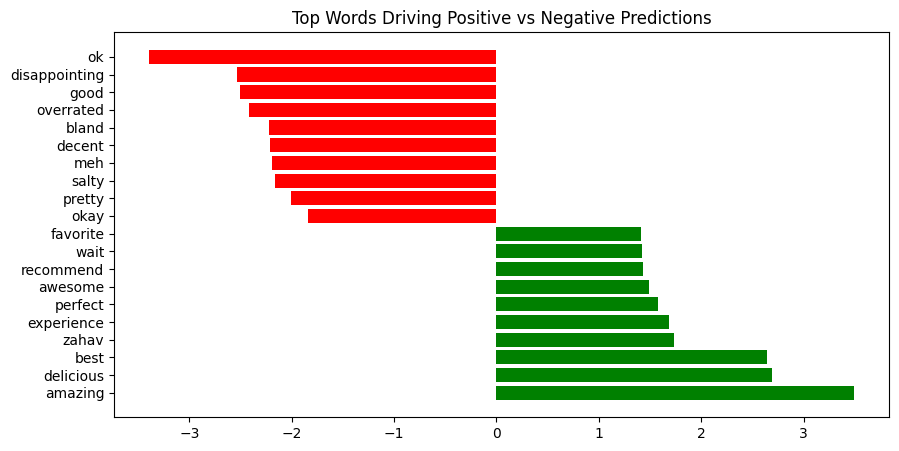

In [ ]:

plt.figure(figsize=(10, 5))
top_positive = word_importance.head(10)
top_negative = word_importance.tail(10)
combined = pd.concat([top_positive, top_negative])
plt.barh(combined['Word'], combined['Importance'], color=['green']*10 + ['red']*10)
plt.title("Top Words Driving Positive vs Negative Predictions")
plt.show()

Implementing GridSearchCV to squeeze more accuracy out of the current architecture by hyperparameter tuning in both the TF-IDF Vectorizer and the Logistic Regression model.

1. Setting min_df = 3/5 instructing the  model  to ignore words that appear too rarely such as typos and random names.

2. Changing ngram_range from (1,2) to expand to Trigrams (1, 3) so that model can catch phrases like "not worth it" or "will not return", which are strong predictors.

3.Introducing sublinear_tf = [Frue, False] to let it decide whether to log-scale term frequencies

In [ ]:
from sklearn.model_selection import GridSearchCV

# 1. Setup the Pipeline (Same as before)
# We define the structure, but we leave the parameters open to change
pipeline = Pipeline([
    ("preprocess", ColumnTransformer(
        transformers=[
            ("nlp", TfidfVectorizer(stop_words='english'), text_col),
            ("meta", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ], remainder="drop")
    ),
    ("clf", LogisticRegression(max_iter=2000, class_weight='balanced', n_jobs=-1))
])

# 2. Define the Parameter Grid (The "Knobs" to turn)
# The Grid Search will try every combination of these lists
param_grid = {
    # TF-IDF Tuning
    'preprocess__nlp__ngram_range': [(1, 2), (1, 3)],  # Try bigrams vs trigrams
    'preprocess__nlp__min_df': [2, 5],                 # Try ignoring rare words
    'preprocess__nlp__sublinear_tf': [True, False],    # Try log-scaling

    # Logistic Regression Tuning
    'clf__C': [0.1, 1, 10],                            # Try different strictness levels
}

# 3. Run the Search
print("Starting Grid Search... (This searches for the best combination)")
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,                 # Split data 3 ways to verify accuracy
    scoring='recall_macro',   # Optimize for F1 Score (balance of precision/recall)
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# 4. Output the Winner
print("\n===== BEST PARAMETERS FOUND =====")
print(grid_search.best_params_)

# 5. Evaluate the Best Model
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)

print("\n===== OPTIMIZED MODEL RESULTS =====\n")
print("Accuracy:", round(accuracy_score(y_test, y_pred_optimized), 3))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_optimized))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_optimized))

Starting Grid Search... (This searches for the best combination)
Fitting 3 folds for each of 24 candidates, totalling 72 fits

===== BEST PARAMETERS FOUND =====
{'clf__C': 0.1, 'preprocess__nlp__min_df': 5, 'preprocess__nlp__ngram_range': (1, 2), 'preprocess__nlp__sublinear_tf': False}

===== OPTIMIZED MODEL RESULTS =====

Accuracy: 0.907

Confusion Matrix:
[[ 74  30]
 [ 59 789]]

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.71      0.62       104
           1       0.96      0.93      0.95       848

    accuracy                           0.91       952
   macro avg       0.76      0.82      0.79       952
weighted avg       0.92      0.91      0.91       952

